In [3]:
# %load train_convnet.py
import sys, os
sys.path.append("..\\deep_learning_from_scratch")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

def box_off():
    ax=plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [4]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

In [4]:
max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

train loss:2.300470257459332
=== epoch:1, train acc:0.321, test acc:0.306 ===
train loss:2.2983121862097917
train loss:2.2956038052950882
train loss:2.2902859009490517
train loss:2.283555107301426
train loss:2.2710883782569775
train loss:2.26045324727225
train loss:2.240320728686399
train loss:2.2084936680983462
train loss:2.208324604608988
train loss:2.1693423913912224
train loss:2.144203526799755
train loss:2.1163360403038425
train loss:2.099997341042839
train loss:2.057072029724513
train loss:1.953244602731922
train loss:1.975609590893302
train loss:1.8491139345914582
train loss:1.7461595142599091
train loss:1.691064069783978
train loss:1.6702832620869024
train loss:1.6401083713609652
train loss:1.4450858850982307
train loss:1.4014474752635602
train loss:1.4101919388722914
train loss:1.352077193791822
train loss:1.2236914353734338
train loss:1.1634763563369332
train loss:1.1226800982250569
train loss:0.9354622920684313
train loss:0.928782345374664
train loss:0.912892558908137
train 

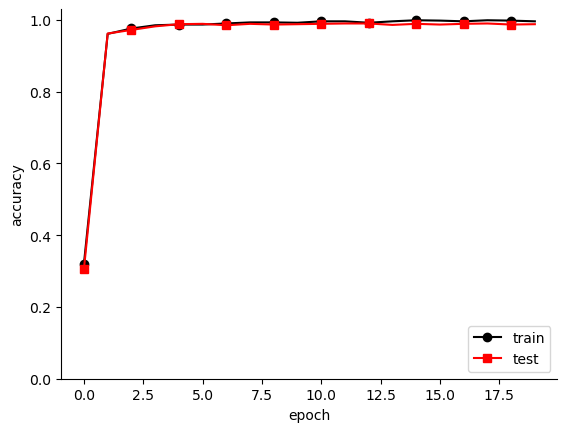

In [6]:
# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, color='k', marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, color='r', marker='s', label='test', markevery=2)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.ylim(0, 1.03)
plt.legend(loc='lower right')
box_off()